

> # **Credit Card Usage Segmentation**



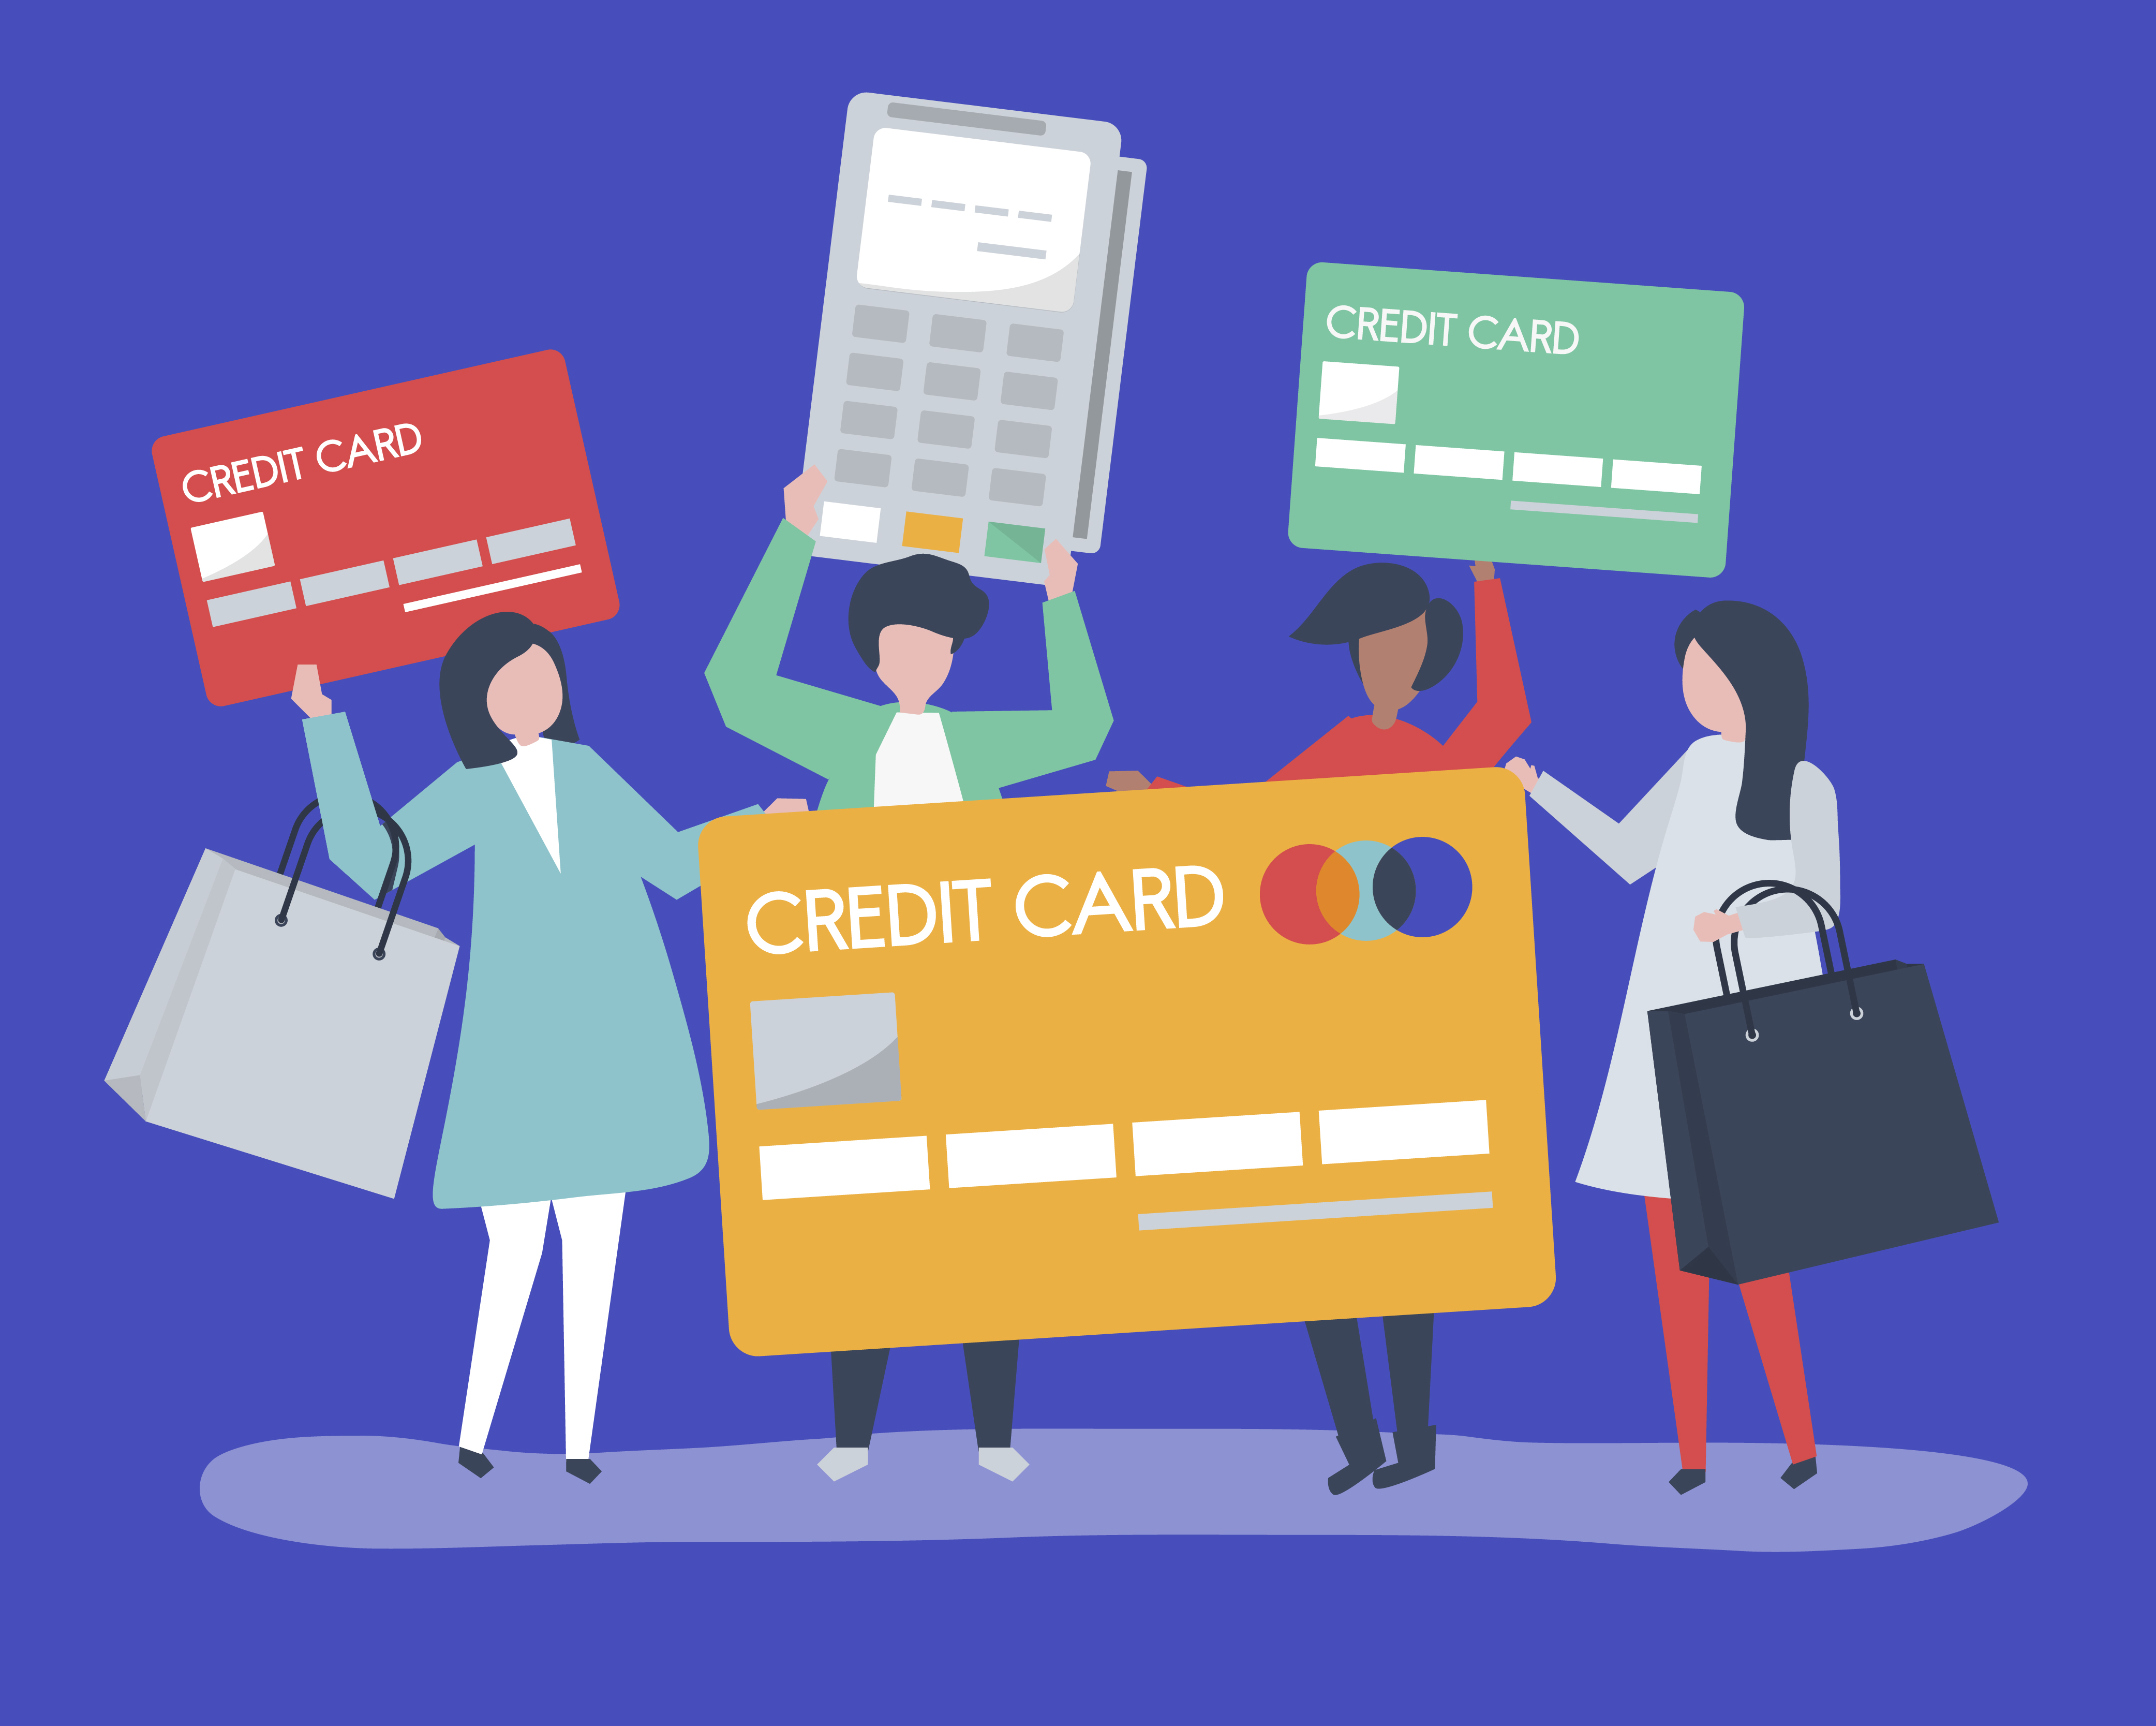

## **Introduction**

**Project Overview**

This project focuses on segmenting credit card customers to better understand their spending behaviors and financial habits. By leveraging unsupervised machine learning techniques, the goal is to group customers into meaningful segments based on various financial attributes. This segmentation will enable banks and financial institutions to tailor their marketing strategies, optimize customer service, and offer personalized financial products, ultimately leading to improved customer satisfaction and retention.

**Project Objective**

The primary objective of this project is to develop an effective customer segmentation model based on their credit card usage patterns. This model will identify distinct customer segments and help financial institutions understand how different groups interact with credit products. With this knowledge, organizations can design targeted marketing campaigns, provide personalized offers, and improve overall customer engagement.

**Project Dataset**

- **Description:** The dataset consists of various financial features related to credit card usage, including transaction history, credit limit, balance, purchases, and cash advances.
- **Columns:** The dataset includes columns such as Balance, One-Off Purchases, Cash Advance, Credit Limit, Payments, Minimum Payments, Purchases Frequency, and Tenure.
- **Purpose:** This dataset is used for segmenting customers based on their financial behaviors and identifying patterns that inform personalized marketing and retention strategies.
- **Applications:** Customer segmentation for personalized marketing, financial product recommendations, and improving customer engagement strategies.
- **Analysis Tasks:** Data preprocessing, exploratory data analysis (EDA), clustering model building, evaluation, and interpretation of clusters for business insights.




> # 1. Importing Libraries and Loading Data



In [111]:
!pip install umap-learn




## 1.1 Importing Necessary Libraries



In [130]:

import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for creating visualizations
import seaborn as sns  # for statistical data visualization
import plotly.express as px # for interactive visualizations

from scipy.stats.mstats import trimmed_var  # for variance analysis
from sklearn.preprocessing import MinMaxScaler  # for scaling data
import umap  # for dimensionality reduction


from sklearn.cluster import KMeans, AgglomerativeClustering  # for performing K-Means and Agglomerative Clustering
from sklearn.mixture import GaussianMixture # for performing clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score  # for evaluating clustering results






## 1.2 Loading and Exploring Data



In [131]:
df = pd.read_csv("/content/Customer Data.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [132]:
# converting columns names to lowercase
df.columns = df.columns.str.lower()
df.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [133]:
df.shape

(8950, 18)

In [134]:
# Hawk eye view of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

# 2. Exploratory Data Analaysis (EDA)

## 2.1 Data Cleaning and Preprocessing

In [135]:
# Statical summary of the dataframe
df.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Data Analysis Summary:

1. The `balance` and `purchases` columns show a wide range of values with high variance, indicating the presence of outliers and highly skewed distributions.
2. The `credit_limit` and `payments` columns have significant discrepancies between the mean and median, suggesting that they may require scaling or transformation to normalize the data for modeling purposes.


In [136]:
# Checking for null values
(df.isnull().sum()/len(df)) * 100

cust_id                             0.000000
balance                             0.000000
balance_frequency                   0.000000
purchases                           0.000000
oneoff_purchases                    0.000000
installments_purchases              0.000000
cash_advance                        0.000000
purchases_frequency                 0.000000
oneoff_purchases_frequency          0.000000
purchases_installments_frequency    0.000000
cash_advance_frequency              0.000000
cash_advance_trx                    0.000000
purchases_trx                       0.000000
credit_limit                        0.011173
payments                            0.000000
minimum_payments                    3.497207
prc_full_payment                    0.000000
tenure                              0.000000
dtype: float64

## Null values definitely present in the features, credit_limit and minimum_payments

In [137]:
# Filling up the missing elements with median of the features, avoiding using mean due to the presence of outliers.
df.loc[(df['minimum_payments'].isnull() == True),
                  'minimum_payments'] = df['minimum_payments'].median()

df.loc[(df["credit_limit"].isnull() == True),
                  "credit_limit"] = df["credit_limit"].median()

df.isnull().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [138]:
# Checking duplicated entries in the data
print('Duplicated in our dataset is:', df.duplicated().sum())


Duplicated in our dataset is: 0


In [139]:
# Droping Customer ID column 'cust_id' as it will not add any value to the clusters
df.drop('cust_id', axis = 1, inplace = True)



> ## 2.2 Understanding the Relationships and Distributions of Features in a Dataset.



# 2.2.1 Univariate Analysis

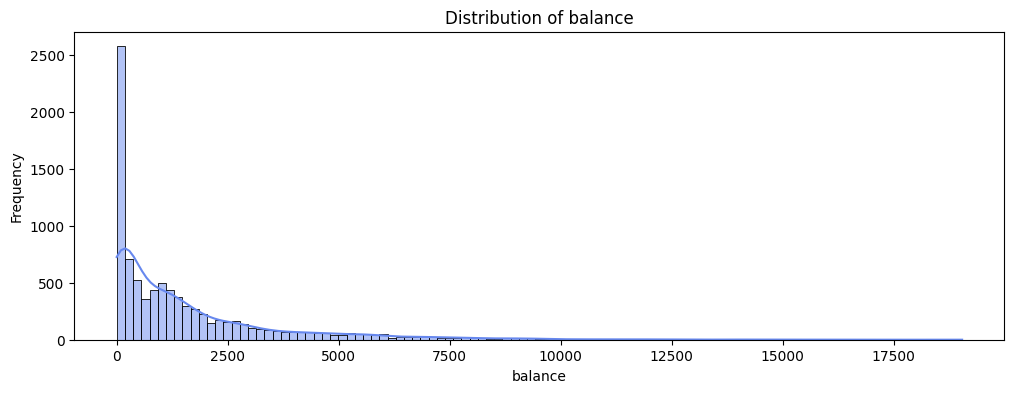

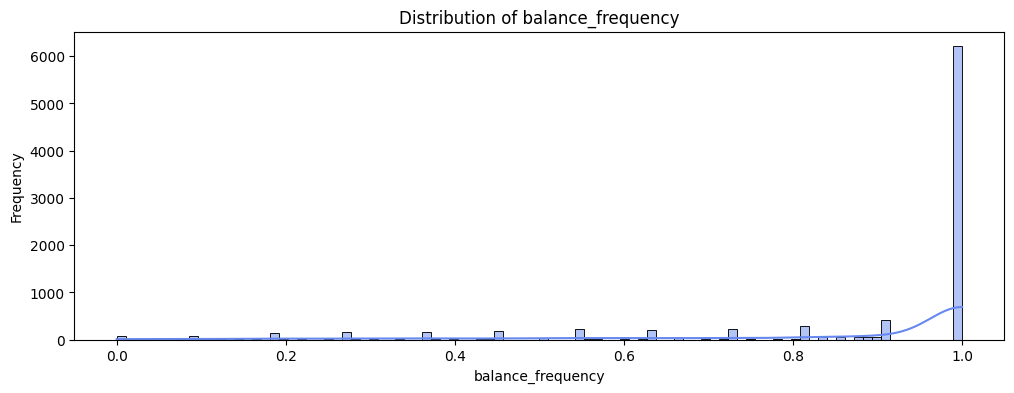

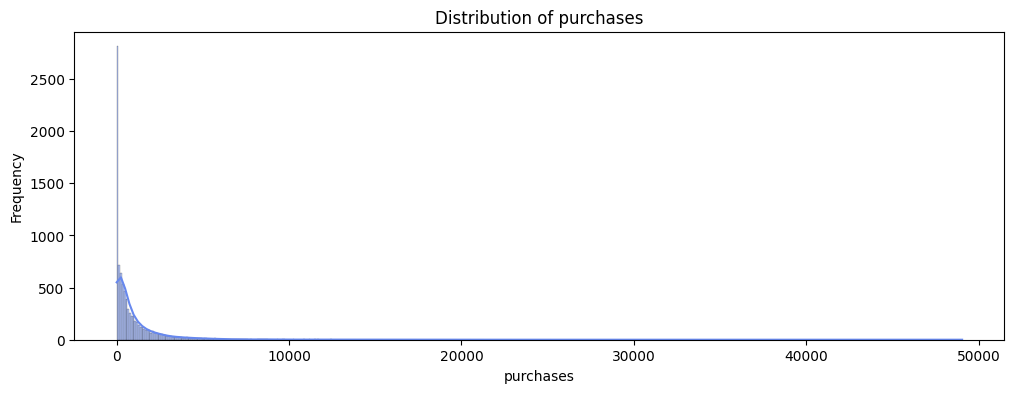

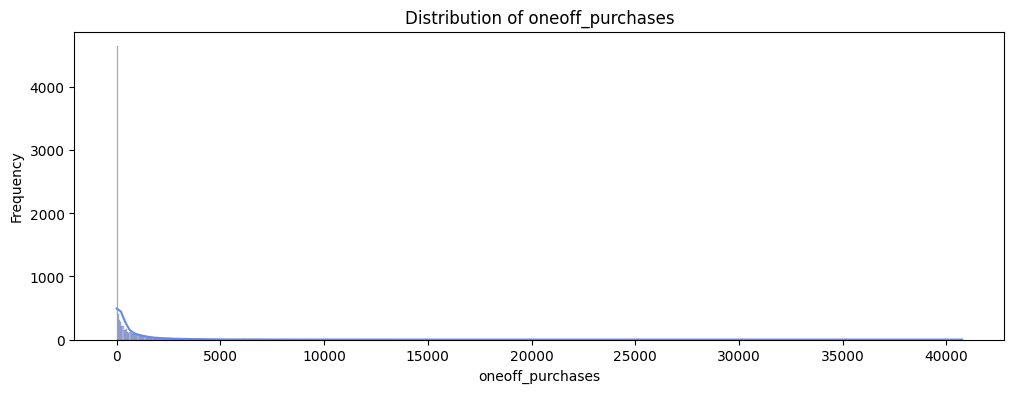

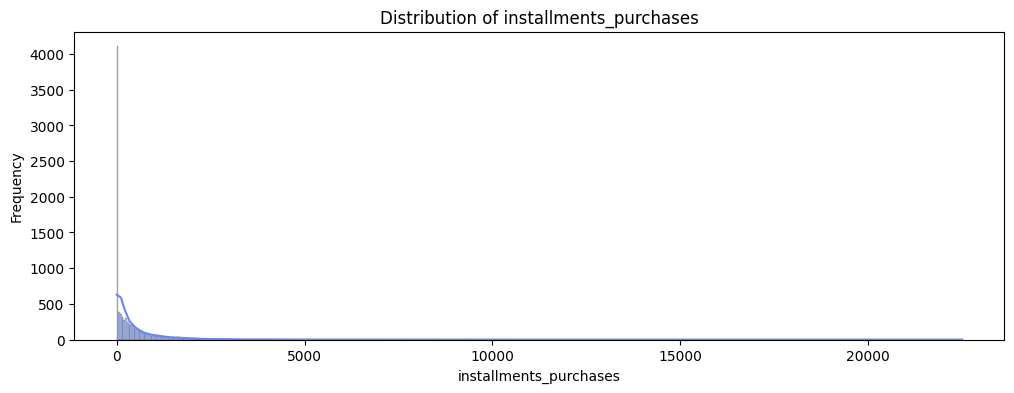

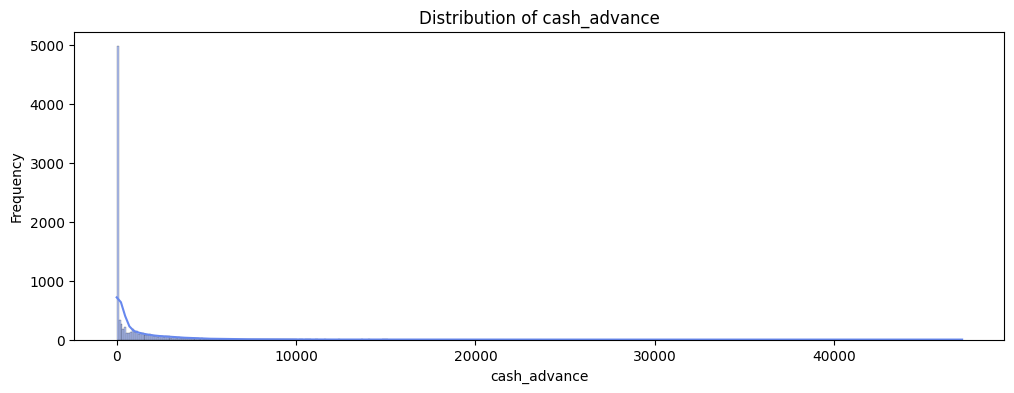

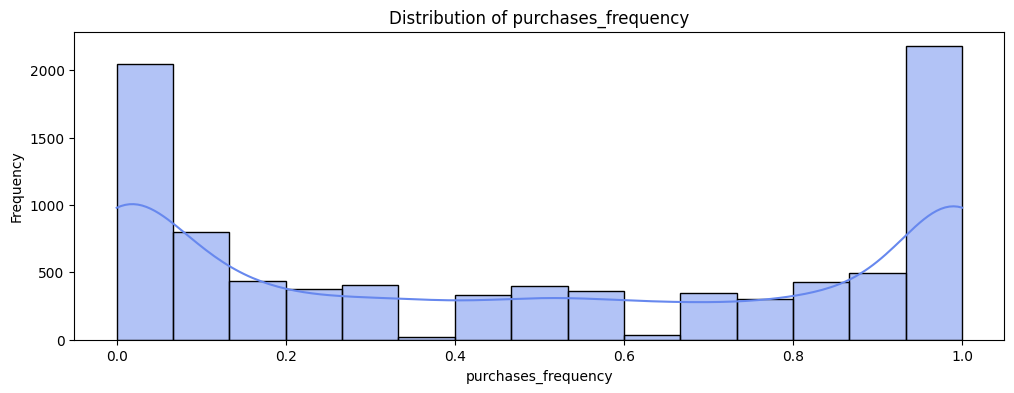

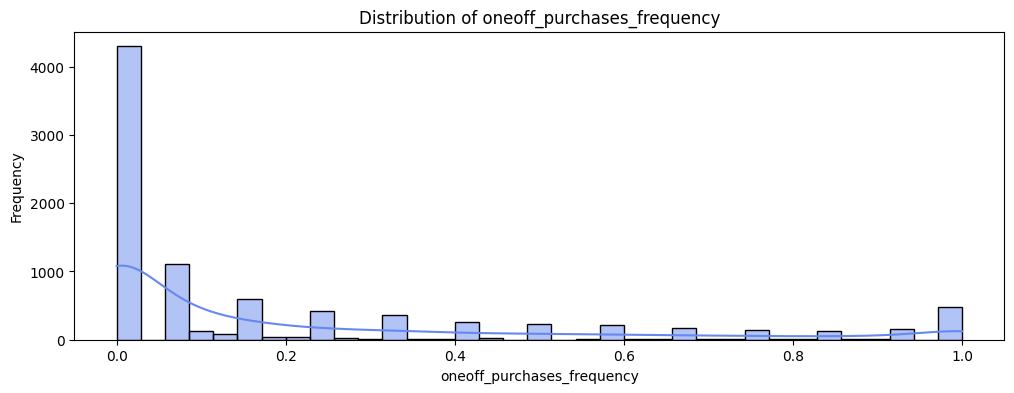

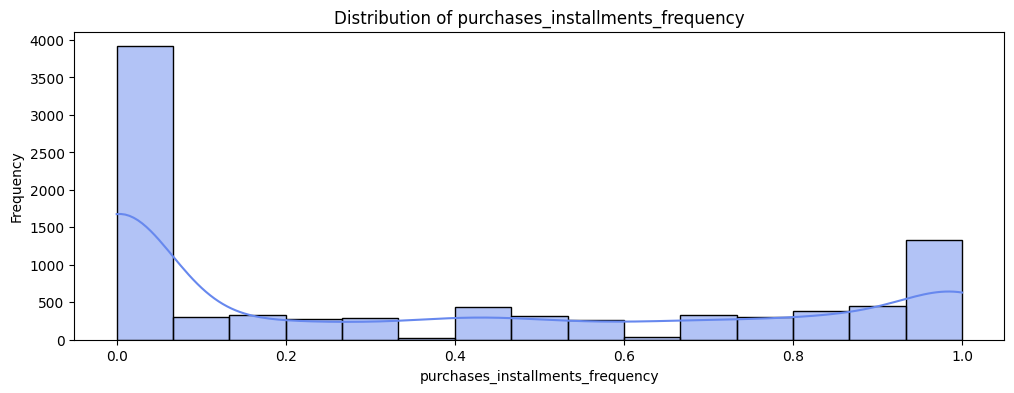

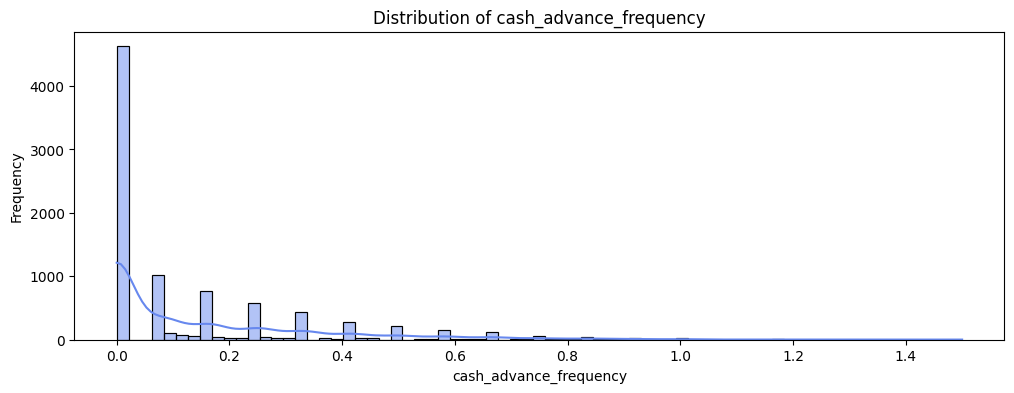

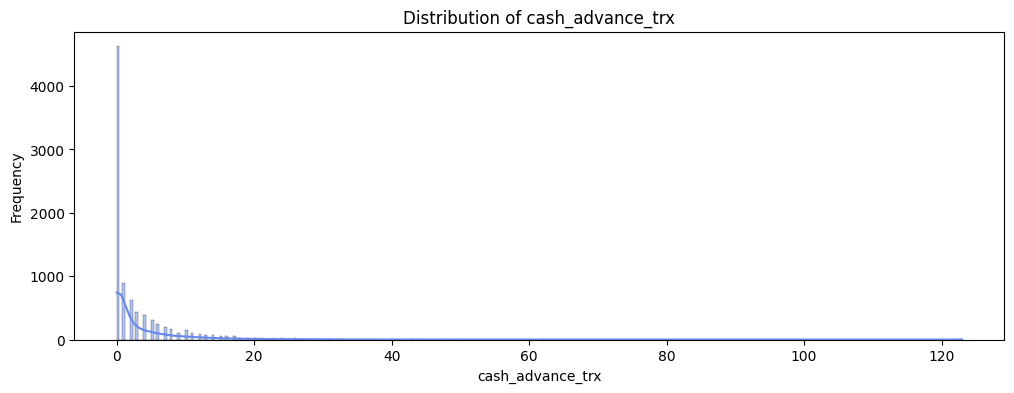

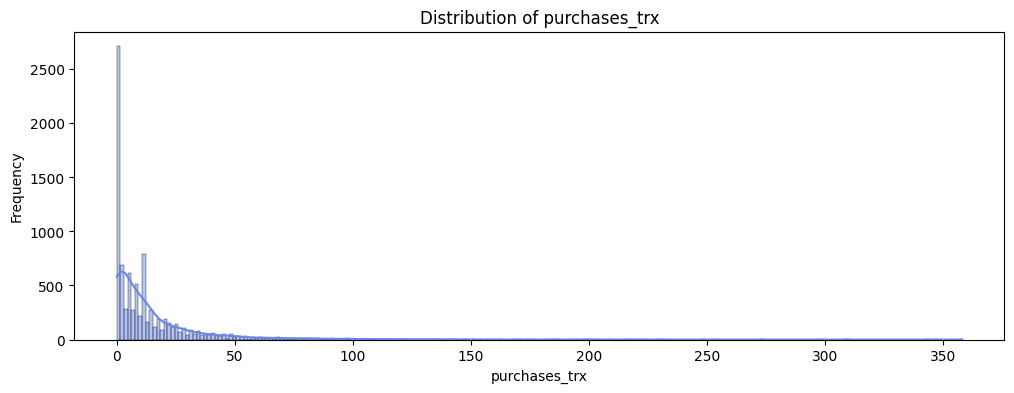

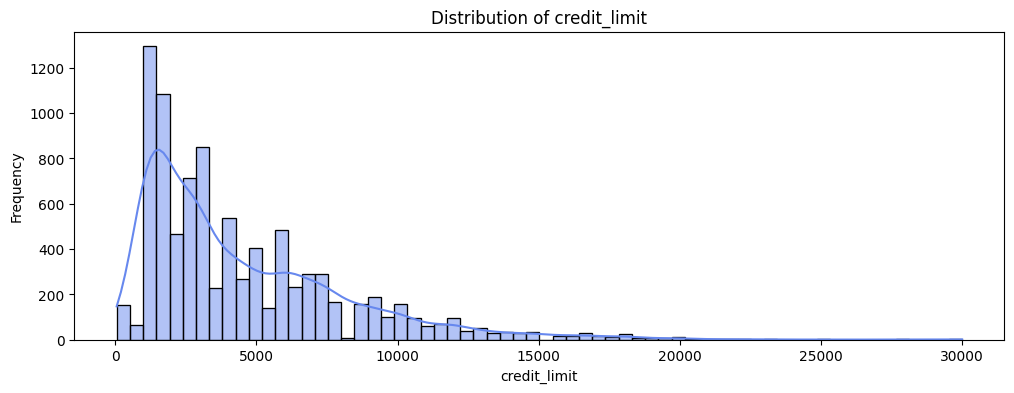

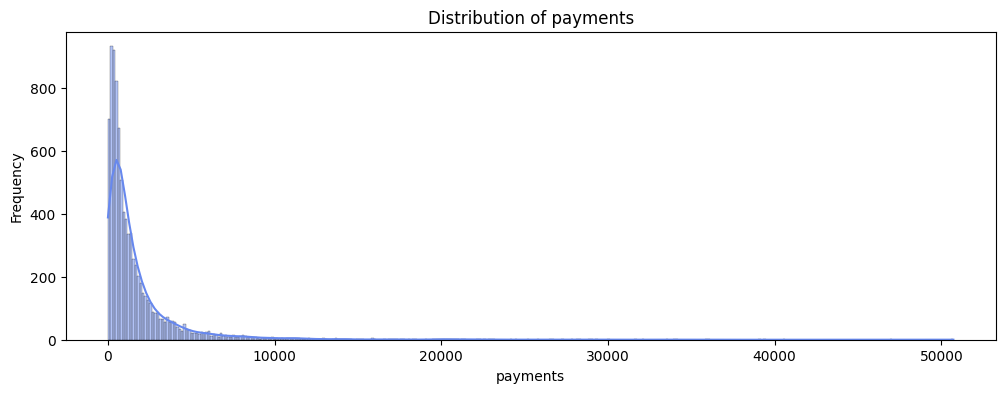

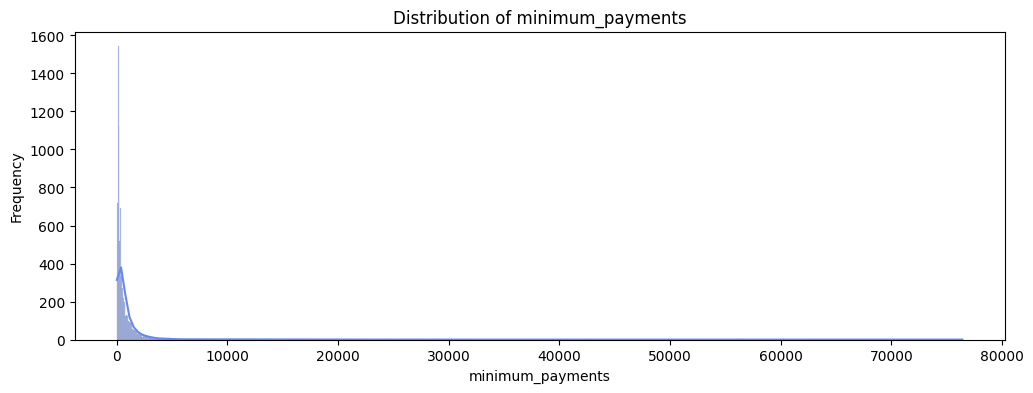

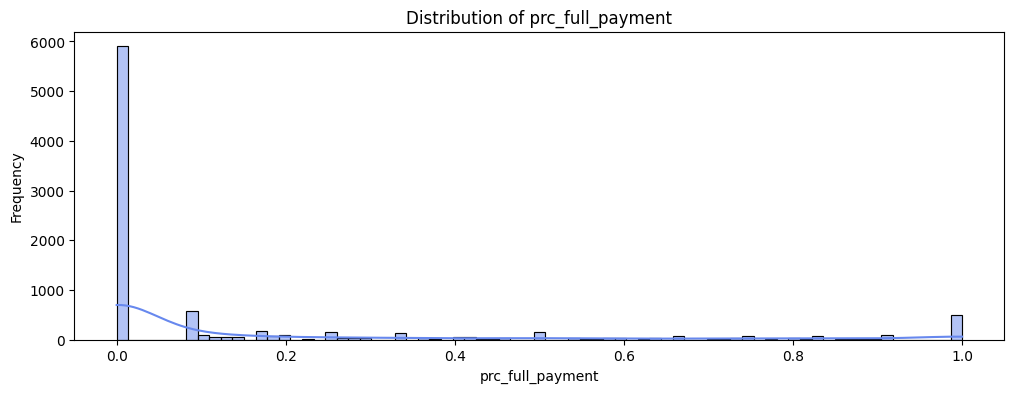

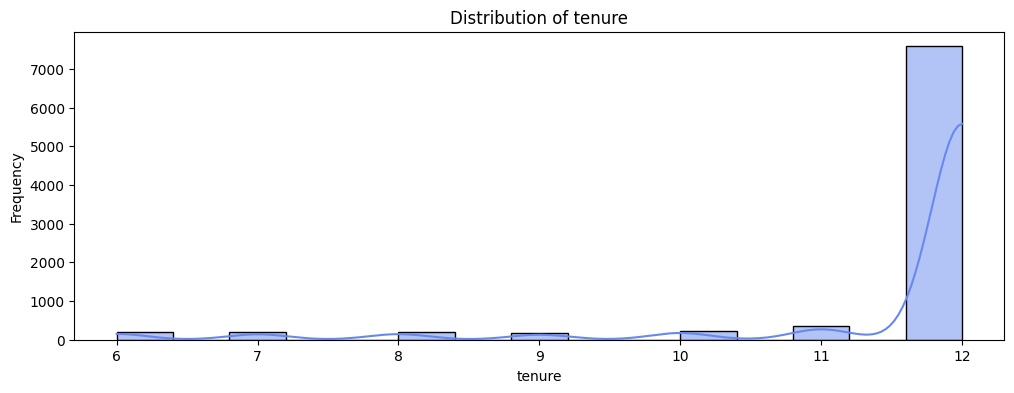

In [140]:
# Plotting distribution with KDE for each column in the dataframe
for col in df.columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Data distribution shows most of the features are skewed and centered arround zero

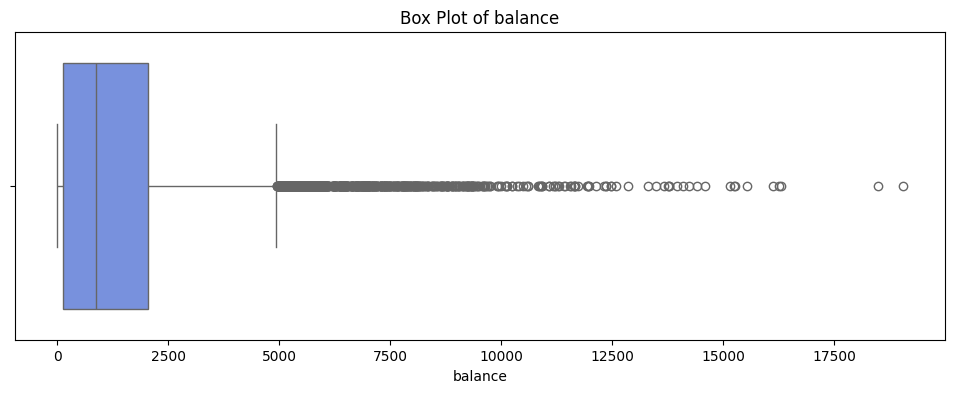

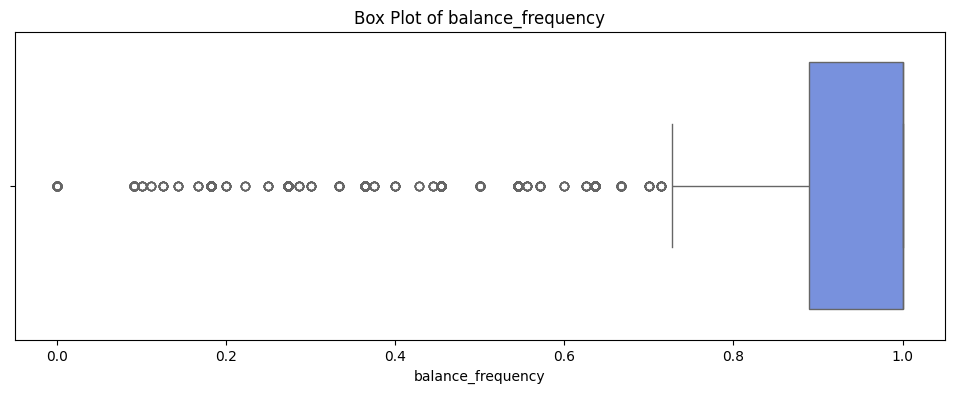

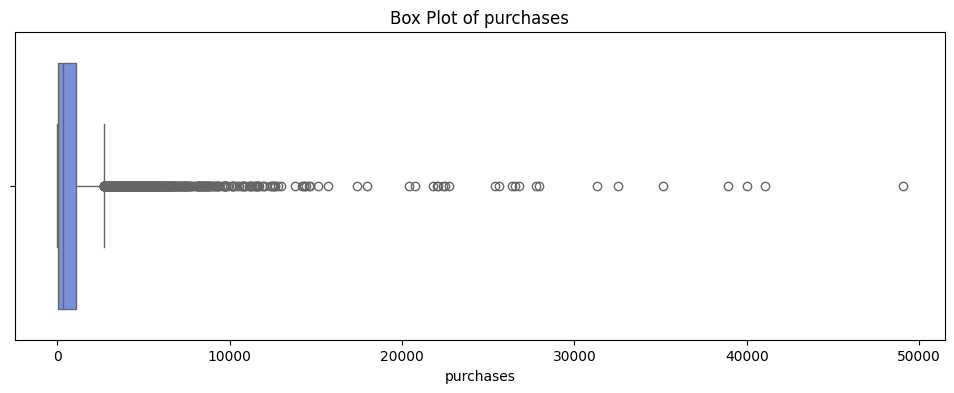

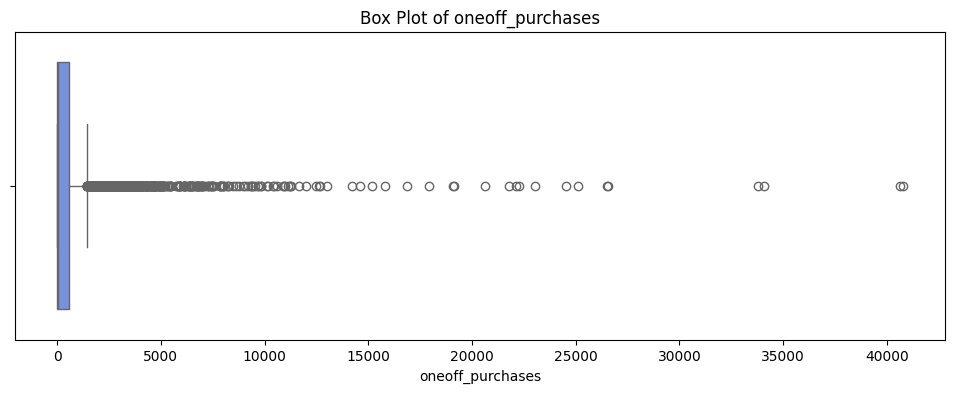

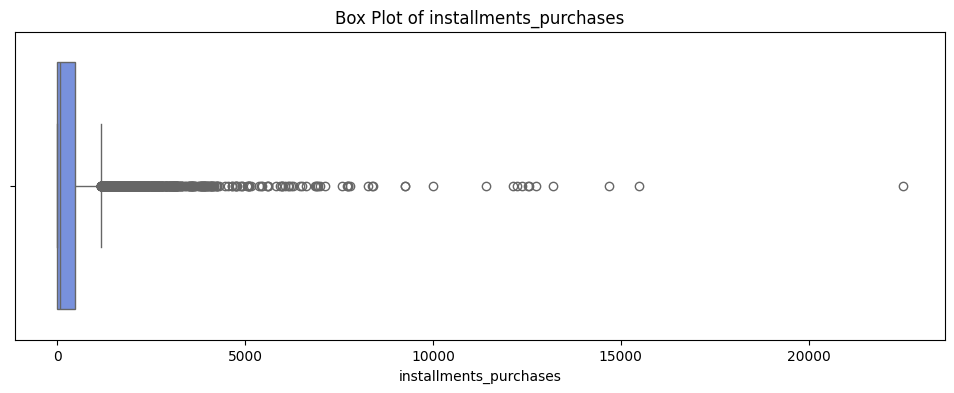

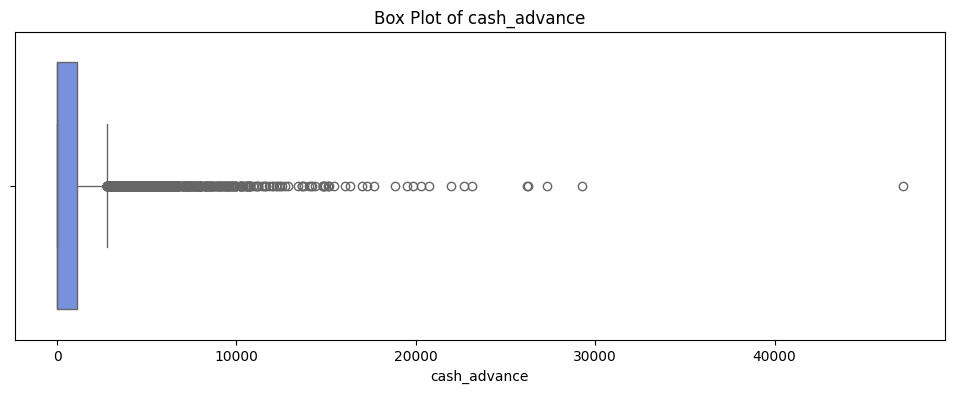

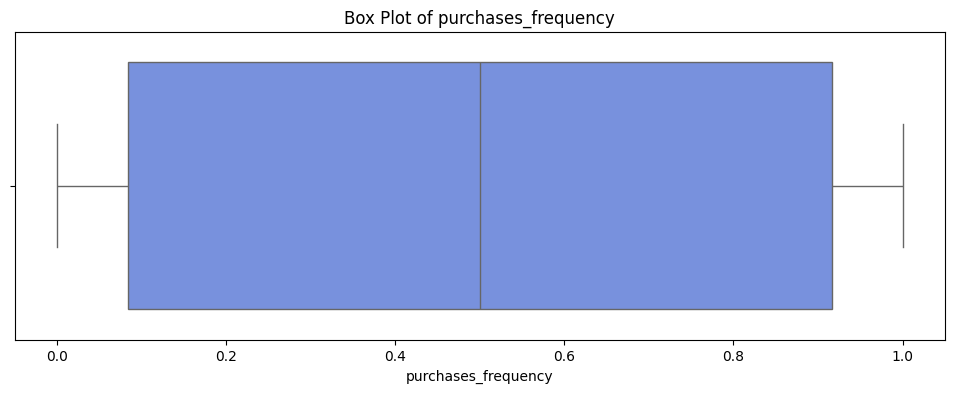

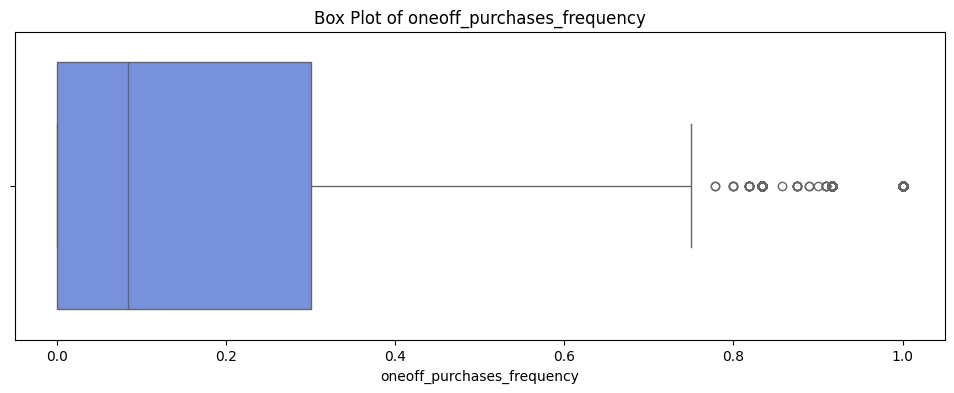

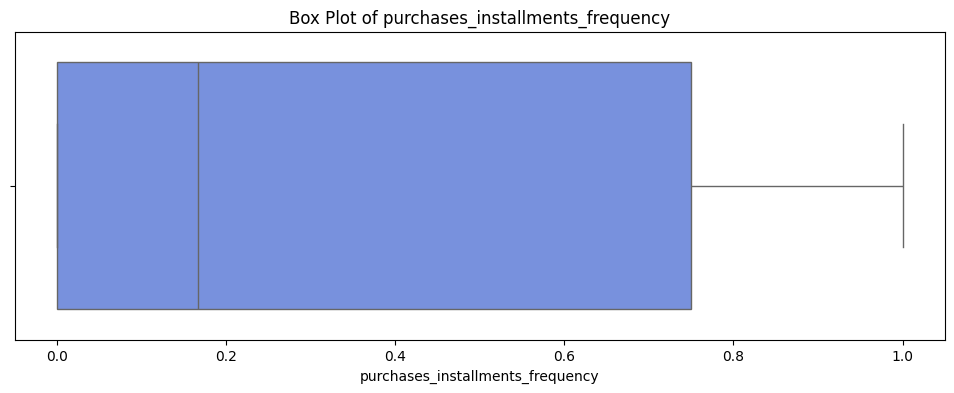

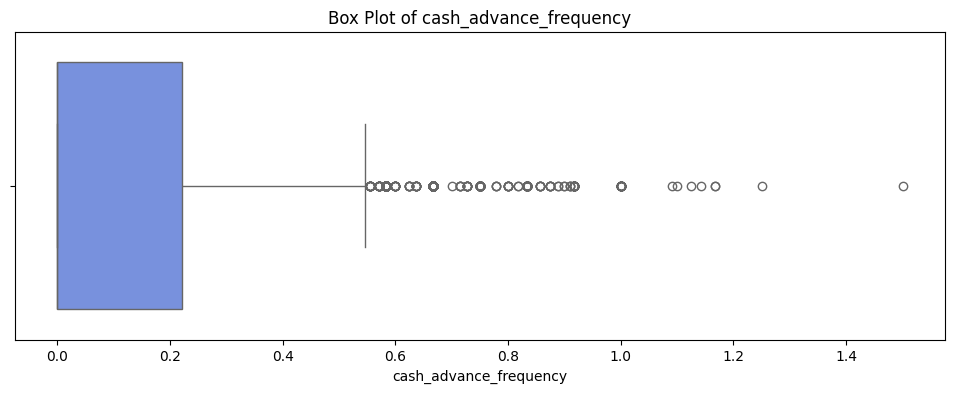

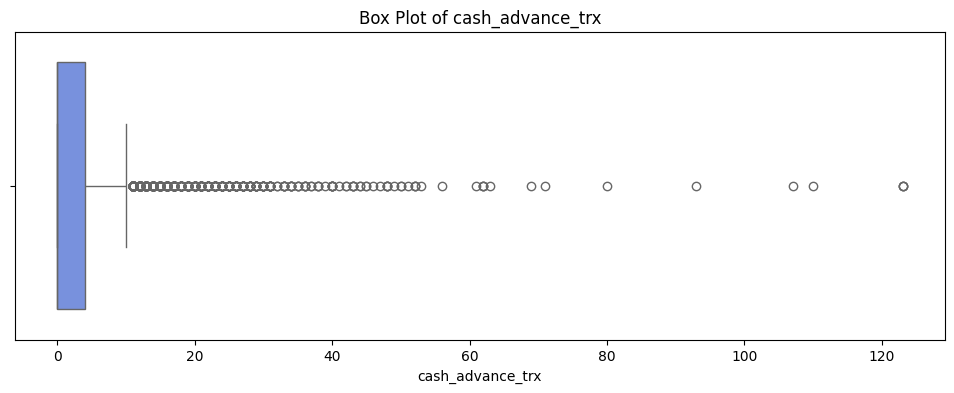

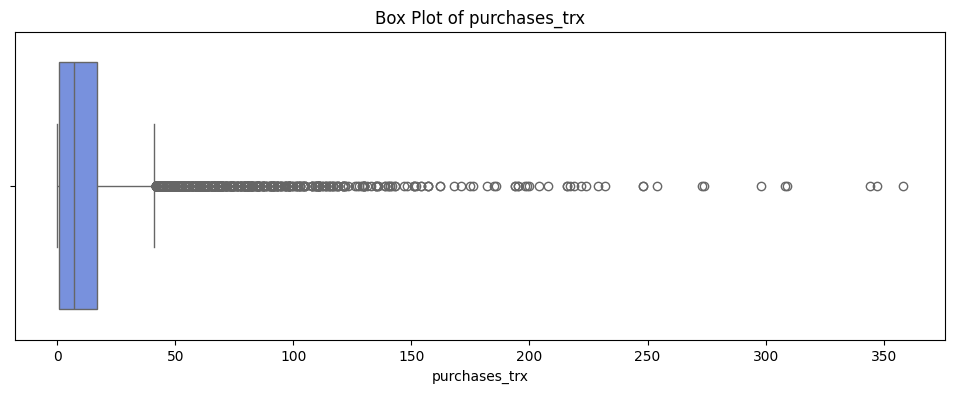

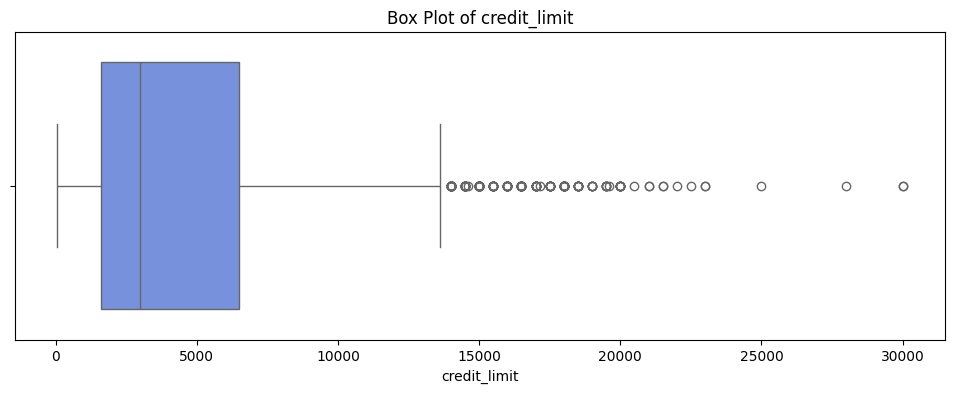

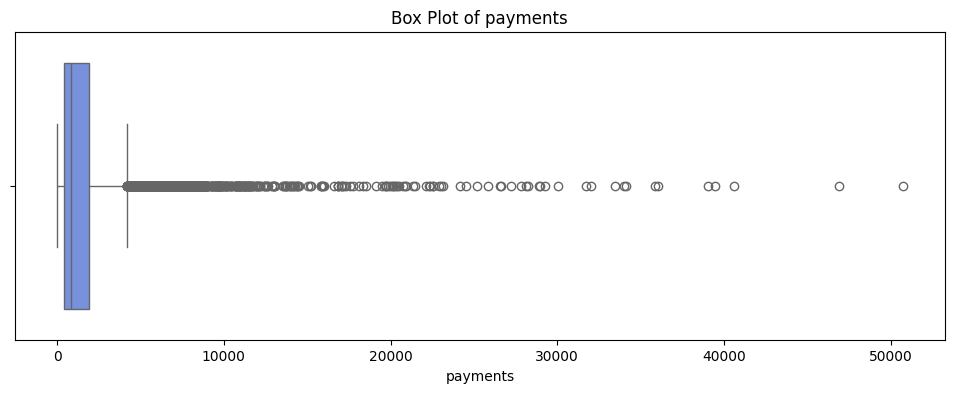

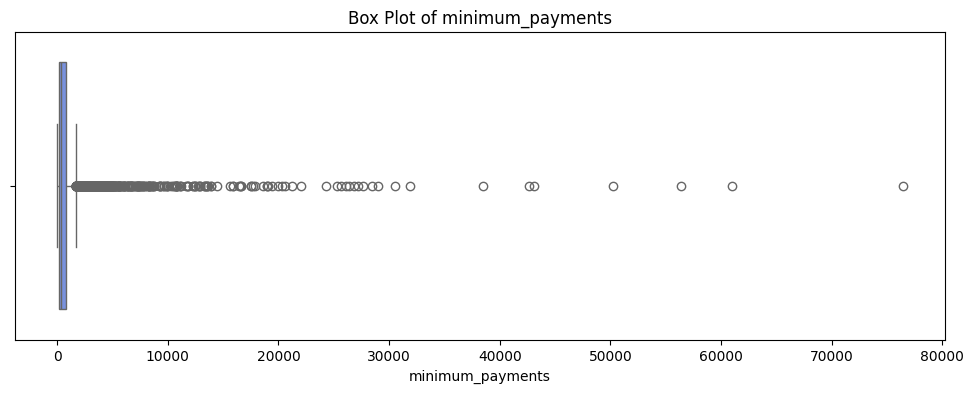

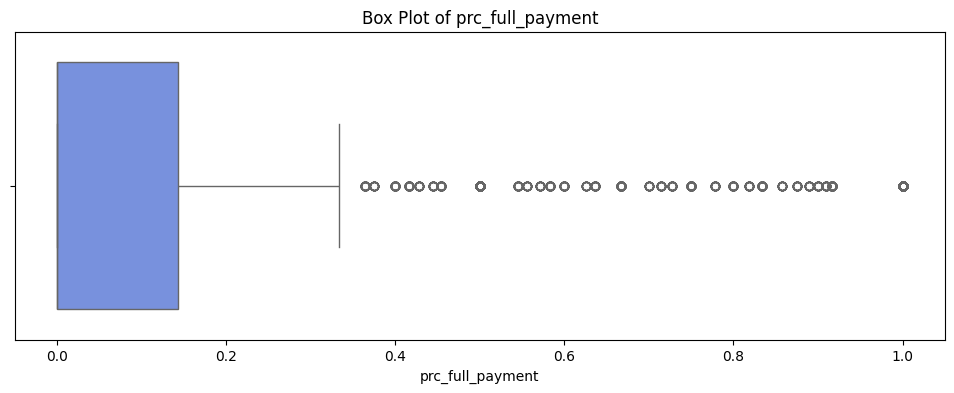

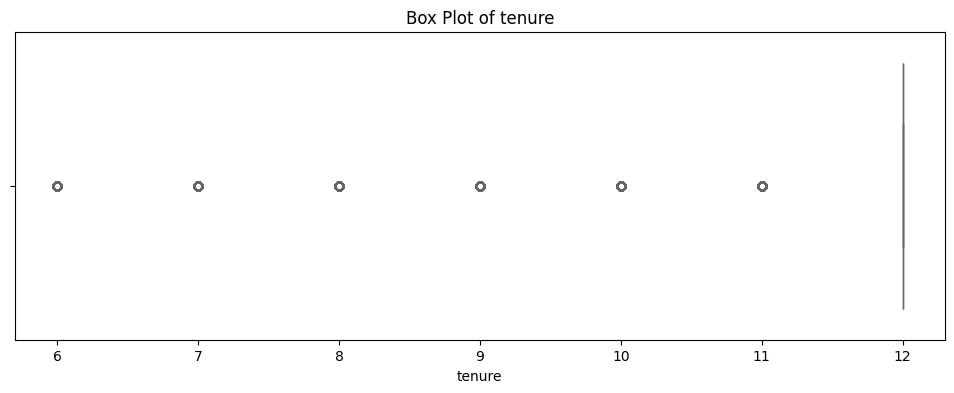

In [141]:
# Plot box plots to identify outliers
for col in df.columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

## Boxplot further rectify the presence of outliers in the data

# 5. Bivariate and Multivariate Analysis:

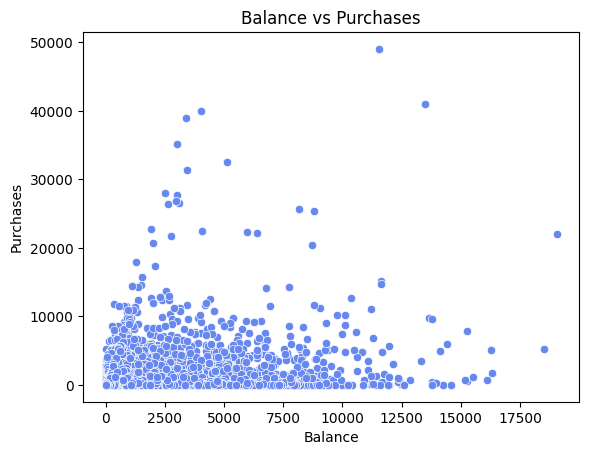

In [142]:
# Scatter plot for balance vs purchases
sns.scatterplot(data=df, x='balance', y='purchases')
plt.title('Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()


## This scatterplot shows no significant relationship between purchases and balance. Most of the purchases lies under 10000 mark, except few outliers.

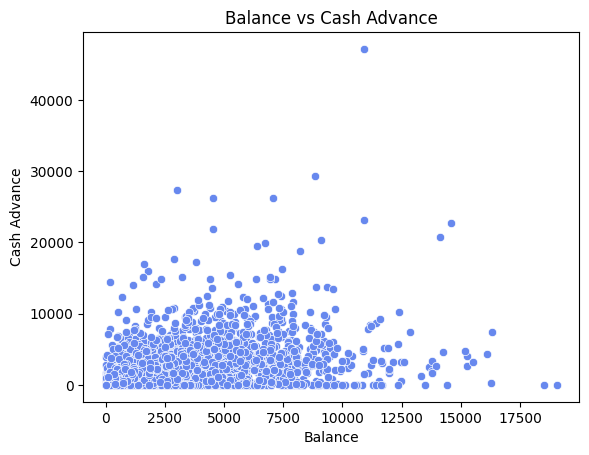

In [143]:
# Scatter plot for balance vs cash_advance
sns.scatterplot(data=df, x='balance', y='cash_advance')
plt.title('Balance vs Cash Advance')
plt.xlabel('Balance')
plt.ylabel('Cash Advance')
plt.show()


## This scatterplot shows no significant relationship between balance and cash_advance. Most of the cash_advance datapoints are under 10000 mark, except few outliers.

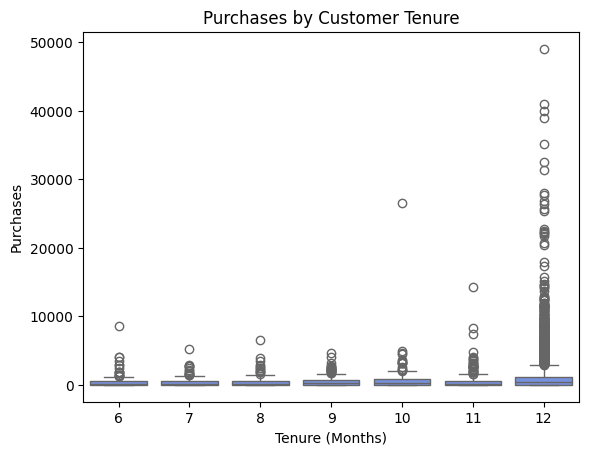

In [144]:
# Box plot for purchases by customer tenure
sns.boxplot(data=df, x='tenure', y='purchases')
plt.title('Purchases by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Purchases')
plt.show()


## This boxplot clearly shows credit card users with 12 months tenure

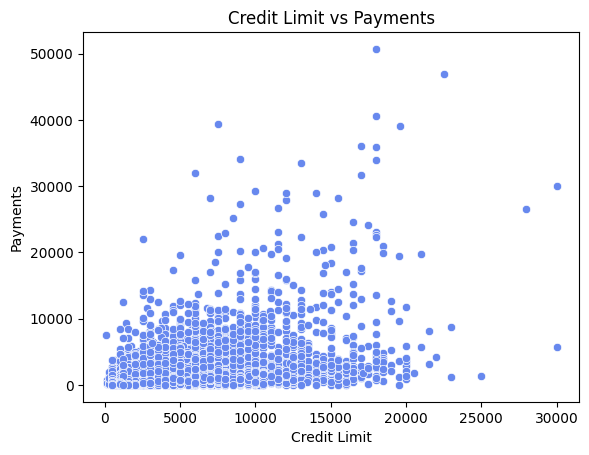

In [145]:
# Box plot for payments by credit limit
sns.scatterplot(data=df, x='credit_limit', y='payments')
plt.title('Credit Limit vs Payments')
plt.xlabel('Credit Limit')
plt.ylabel('Payments')
plt.show()


## This scatterplot shows there is no significant relationship between Credit limit and payments. Most of the payments datapoints are under 10000 mark, except few outliers.

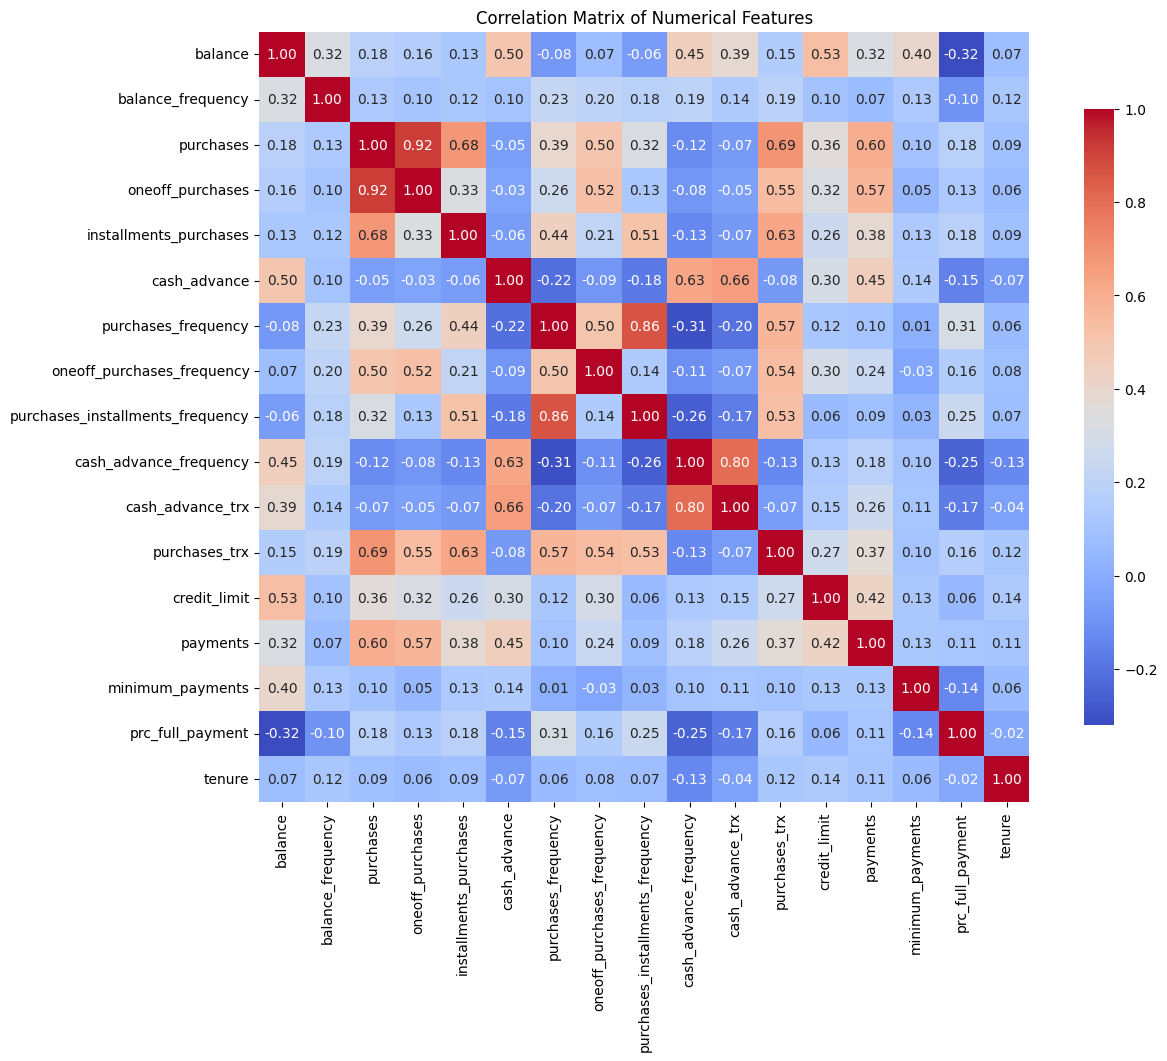

In [146]:
# Correlation matrix to find the linear relationships between features
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Insights:
- **oneoff_purchases & purchases (0.92)**: High one-off purchases strongly align with total purchase amounts, suggesting these variables capture similar spending behavior.
- **cash_advance & cash_advance_trx (0.87)**: Frequent cash advances are closely tied to the overall cash advance amount.
- **balance & credit_limit (0.53)**: Customers with higher credit limits generally maintain higher balances.

### Implications:
- **Feature Reduction**: Strongly correlated pairs (such as oneoff_purchases & purchases) could be simplified, reducing redundancy.
- **Multicollinearity Alert**: High correlations indicate dependencies that could affect model stability.


# 6. Feature Engineering

In [147]:
# balance-to-Credit-limit
df["balance-to-Credit-limit"] = df["balance"] / df["credit_limit"]
# purchases-to-Credit-limit
df["purchases-to-Credit-limit"] = df["purchases"] / df["credit_limit"]
# cash_advance-to-Credit-limit
df["cash_advance-to-Credit-limit"] = df["cash_advance"] / df["credit_limit"]
# average_purchase_amount_per_transaction
df["average_purchase_amount"] = df["purchases"] / df["purchases_trx"]
# average_cash_advance_per_transaction
df["average_cash_advance_per_transaction"] = df["cash_advance"] / df["cash_advance_trx"]
# payment_to_credit_limit
df["payment_to_credit_limit"] = df["payments"] / df["credit_limit"]
# total_purchases_frequency
df["total_purchases_frequency"] = df["purchases_frequency"] + df["oneoff_purchases_frequency"] + df["purchases_installments_frequency"]
# minimum_payments_to_balance
df["minimum_payments_to_balance"] = df["minimum_payments"] / df["balance"]
# installments_vs_One-Off_purchases
df["installments_vs_One-Off_purchases"] = df["installments_purchases"] / df["oneoff_purchases"]
# tenure_adjusted_frequency
df["tenure_adjusted_frequency"] = df["purchases_frequency"] / df["tenure"]
df.shape

(8950, 27)

### New Feature Engineering:
- Created ratios like balance-to-credit-limit, purchases-to-credit-limit, and cash_advance-to-credit-limit to assess the proportion of credit utilization.
- Added metrics such as average purchase amount per transaction and payment-to-credit-limit to capture spending and repayment behavior.


In [148]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

### Addressed infinite values

## 6.1 Log Tranformation and outlier clipping

In [149]:
# Apply log transformation directly to the features
df['balance'] = np.log1p(df['balance'])
df['purchases'] = np.log1p(df['purchases'])
df['oneoff_purchases'] = np.log1p(df['oneoff_purchases'])
df['installments_purchases'] = np.log1p(df['installments_purchases'])
df['cash_advance'] = np.log1p(df['cash_advance'])
df['minimum_payments_to_balance'] = np.log1p(df['minimum_payments_to_balance'])
df['installments_vs_One-Off_purchases'] = np.log1p(df['installments_vs_One-Off_purchases'])

# Clip extreme values directly in the same columns if needed
df['balance'] = df['balance'].clip(upper=5000)
df['credit_limit'] = df['credit_limit'].clip(upper=5000)
df['purchases'] = df['purchases'].clip(upper=10000)
df['cash_advance'] = df['cash_advance'].clip(upper=10000)

In [150]:
df.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0  3.735304           0.818182   4.568506          0.000000   
1  8.071989           0.909091   0.000000          0.000000   
2  7.822504           1.000000   6.651791          6.651791   
3  7.419183           0.636364   7.313220          7.313220   
4  6.707735           1.000000   2.833213          2.833213   

   installments_purchases  cash_advance  purchases_frequency  \
0                4.568506      0.000000             0.166667   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      5.331694             0.083333   
4                0.000000      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  ...  balance-to-Credit-limit  \
0                0.000000  ...                 0.040901   
1                0.250000  ...                 0.457495   
2                0.000000  ...                 0.332687   
3                0.083333  ...                 0.222223   
4                0.000000  ...                 0.681429   

   purchases-to-Credit-limit  cash_advance-to-Credit-limit  \
0                   0.095400                      0.000000   
1                   0.000000                      0.920421   
2                   0.103089                      0.000000   
3                   0.199867                      0.027438   
4                   0.013333                      0.000000   

   average_purchase_amount  average_cash_advance_per_transaction  \
0                47.700000                              0.000000   
1                 0.000000                           1610.736371   
2                64.430833                              0.000000   
3              1499.000000                            205.788017   
4                16.000000                              0.000000   

   payment_to_credit_limit  total_purchases_frequency  \
0                 0.201802                   0.250000   
1                 0.586148                   0.000000   
2                 0.082942                   2.000000   
3                 0.000000                   0.166666   
4                 0.565279                   0.166666   

   minimum_payments_to_balance  installments_vs_One-Off_purchases  \
0                     1.484087                                0.0   
1                     0.288818                                0.0   
2                     0.224264                                0.0   
3                     0.171771                                0.0   
4                     0.261872                                0.0   

   tenure_adjusted_frequency  
0                   0.013889  
1                   0.000000  
2                   0.083333  
3                   0.006944  
4                   0.006944  

[5 rows x 27 columns]

# 7. Feature Scaling

In [151]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0  0.379045           0.818182   0.422994          0.000000   
1  0.819116           0.909091   0.000000          0.000000   
2  0.793799           1.000000   0.615884          0.626611   
3  0.752871           0.636364   0.677125          0.688918   
4  0.680676           1.000000   0.262325          0.266894   

   installments_purchases  cash_advance  purchases_frequency  \
0                0.455879      0.000000             0.166667   
1                0.000000      0.815075             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.495472             0.083333   
4                0.000000      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  ...  balance-to-Credit-limit  \
0                0.000000  ...                 0.002571   
1                0.166667  ...                 0.028755   
2                0.000000  ...                 0.020911   
3                0.055555  ...                 0.013968   
4                0.000000  ...                 0.042830   

   purchases-to-Credit-limit  cash_advance-to-Credit-limit  \
0                   0.011104                      0.000000   
1                   0.000000                      0.008107   
2                   0.011999                      0.000000   
3                   0.023264                      0.000242   
4                   0.001552                      0.000000   

   average_purchase_amount  average_cash_advance_per_transaction  \
0                 0.007974                              0.000000   
1                 0.000000                              0.108566   
2                 0.010771                              0.000000   
3                 0.250599                              0.013870   
4                 0.002675                              0.000000   

   payment_to_credit_limit  total_purchases_frequency  \
0                 0.001333                   0.083333   
1                 0.003871                   0.000000   
2                 0.000548                   0.666667   
3                 0.000000                   0.055555   
4                 0.003734                   0.055555   

   minimum_payments_to_balance  installments_vs_One-Off_purchases  \
0                     0.137963                                0.0   
1                     0.026849                                0.0   
2                     0.020848                                0.0   
3                     0.015968                                0.0   
4                     0.024344                                0.0   

   tenure_adjusted_frequency  
0                   0.083334  
1                   0.000000  
2                   0.500000  
3                   0.041667  
4                   0.041667  

[5 rows x 27 columns]

# 8. Feature Selection

In [152]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr().abs()

# Identify highly correlated features (threshold > 0.6)
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.6:
            highly_correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))



# Display the pairs of highly correlated features
print("Highly correlated feature pairs with correlation > 0.8:")
for feature_pair in highly_correlated_features:
    print(feature_pair)

Highly correlated feature pairs with correlation > 0.8:
('balance', 'balance_frequency')
('balance', 'balance-to-Credit-limit')
('balance', 'minimum_payments_to_balance')
('purchases', 'oneoff_purchases')
('purchases', 'installments_purchases')
('purchases', 'purchases_frequency')
('purchases', 'total_purchases_frequency')
('purchases', 'tenure_adjusted_frequency')
('oneoff_purchases', 'oneoff_purchases_frequency')
('installments_purchases', 'purchases_frequency')
('installments_purchases', 'purchases_installments_frequency')
('installments_purchases', 'total_purchases_frequency')
('installments_purchases', 'tenure_adjusted_frequency')
('cash_advance', 'cash_advance_frequency')
('purchases_frequency', 'purchases_installments_frequency')
('purchases_frequency', 'total_purchases_frequency')
('purchases_frequency', 'tenure_adjusted_frequency')
('oneoff_purchases_frequency', 'total_purchases_frequency')
('purchases_installments_frequency', 'total_purchases_frequency')
('purchases_installme

In [153]:
drop_cols = []
for col in highly_correlated_features:
    trim_var1 = trimmed_var(df_scaled[col[0]], limits=(0.1, 0.1))
    trim_var2 = trimmed_var(df_scaled[col[1]], limits=(0.1, 0.1))
    if trim_var1 > trim_var2:
      drop_cols.append(col[1])
    else:
      drop_cols.append(col[0])

print(drop_cols)
print(len(drop_cols))


['balance_frequency', 'balance-to-Credit-limit', 'minimum_payments_to_balance', 'purchases', 'purchases', 'purchases', 'purchases', 'tenure_adjusted_frequency', 'oneoff_purchases_frequency', 'installments_purchases', 'installments_purchases', 'total_purchases_frequency', 'tenure_adjusted_frequency', 'cash_advance_frequency', 'purchases_installments_frequency', 'total_purchases_frequency', 'tenure_adjusted_frequency', 'oneoff_purchases_frequency', 'total_purchases_frequency', 'tenure_adjusted_frequency', 'cash_advance_trx', 'purchases_trx', 'payment_to_credit_limit', 'tenure_adjusted_frequency']
24


In [154]:
df_scaled = df_scaled.drop(columns=[*drop_cols])
print(df_scaled.shape)
df_scaled.head()

(8950, 14)


balance  oneoff_purchases  cash_advance  purchases_frequency  \
0  0.379045          0.000000      0.000000             0.166667   
1  0.819116          0.000000      0.815075             0.000000   
2  0.793799          0.626611      0.000000             1.000000   
3  0.752871          0.688918      0.495472             0.083333   
4  0.680676          0.266894      0.000000             0.083333   

   credit_limit  payments  minimum_payments  prc_full_payment  tenure  \
0      0.191919  0.003979          0.001826          0.000000     1.0   
1      1.000000  0.080893          0.014034          0.222222     1.0   
2      1.000000  0.012264          0.008210          0.000000     1.0   
3      1.000000  0.000000          0.004088          0.000000     1.0   
4      0.232323  0.013374          0.003204          0.000000     1.0   

   purchases-to-Credit-limit  cash_advance-to-Credit-limit  \
0                   0.011104                      0.000000   
1                   0.000000                      0.008107   
2                   0.011999                      0.000000   
3                   0.023264                      0.000242   
4                   0.001552                      0.000000   

   average_purchase_amount  average_cash_advance_per_transaction  \
0                 0.007974                              0.000000   
1                 0.000000                              0.108566   
2                 0.010771                              0.000000   
3                 0.250599                              0.013870   
4                 0.002675                              0.000000   

   installments_vs_One-Off_purchases  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0

# 6. Dimensionality Reduction

In [155]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



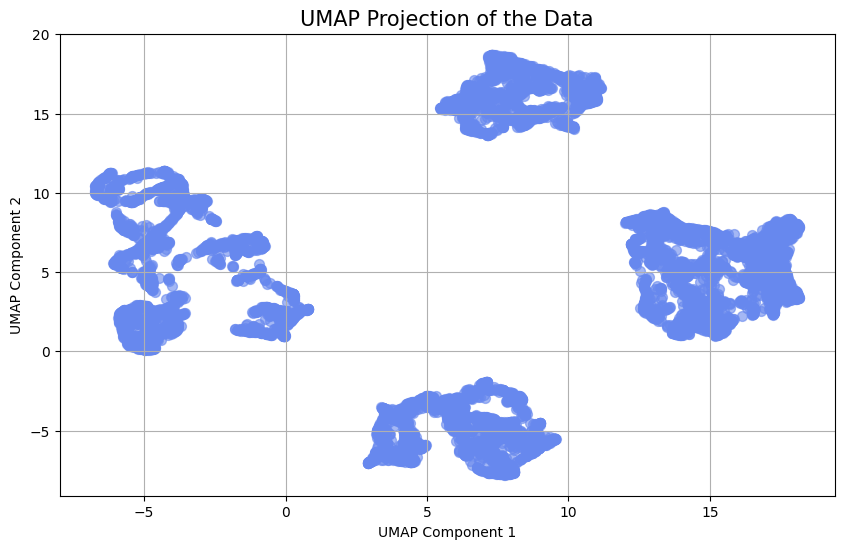

In [156]:
# Step 4: Visualize UMAP output
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=50, alpha=0.6)
plt.title('UMAP Projection of the Data', fontsize=15)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid()
plt.show()

# 7. Model Building

## 7.1 Kmeans

## Hyperparameter tunning for Kmeans

In [157]:
n_clusters = range(2 , 13)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters= k ,random_state=42)
    # fit model
    model.fit(X_umap)
    # calculating and appending inertia
    inertia_errors.append(model.inertia_)
    # calculating and appending Silhouette score
    silhouette_scores.append(silhouette_score(X_umap , model.labels_))





print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [484036.3125, 266903.375, 79238.4921875, 55265.23828125, 50740.8359375, 45196.640625, 38310.00390625, 33785.4609375, 31628.193359375, 28367.4453125, 27583.189453125]

Silhouette Scores: [0.504229, 0.5718377, 0.71117103, 0.6746102, 0.60559124, 0.60588443, 0.55735093, 0.5000646, 0.51580286, 0.44041935, 0.43665427]


## Plotting Inertia to identify optimal number of clusters

In [158]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x = n_clusters , y = inertia_errors , title = "K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title = "Number of Clusters" , yaxis_title = "Inertia")
fig.show()

## Plotting Sillhoutte score to identify optimal number of clusters

In [159]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x = n_clusters , y = silhouette_scores , title = "K-Means Model: Silhouette Score vs Number of Clusters"
)
fig.update_layout(xaxis_title = "Number of Clusters" , yaxis_title = "Silhouette Score")

fig.show()

## Both interia plot and sillhoutte score plot suggest 4 clusters

## Building and evaluating Kmeans model with 4 clusters

In [160]:
k_model = KMeans(n_clusters=4, random_state=42)
y_kmeans = k_model.fit_predict(X_umap)
k_labels = k_model.labels_
silhouette = silhouette_score(X_umap, y_kmeans)
davies = davies_bouldin_score(X_umap, k_labels)
print(np.unique(k_labels))

print("Silhouette Score for 4 clusters:", silhouette)
print("davies_bouldin Score for 4 clusters:", davies)

[0 1 2 3]
Silhouette Score for 4 clusters: 0.71117103
davies_bouldin Score for 4 clusters: 0.38310316368325903


## Plotting Kmeans predicted clusters

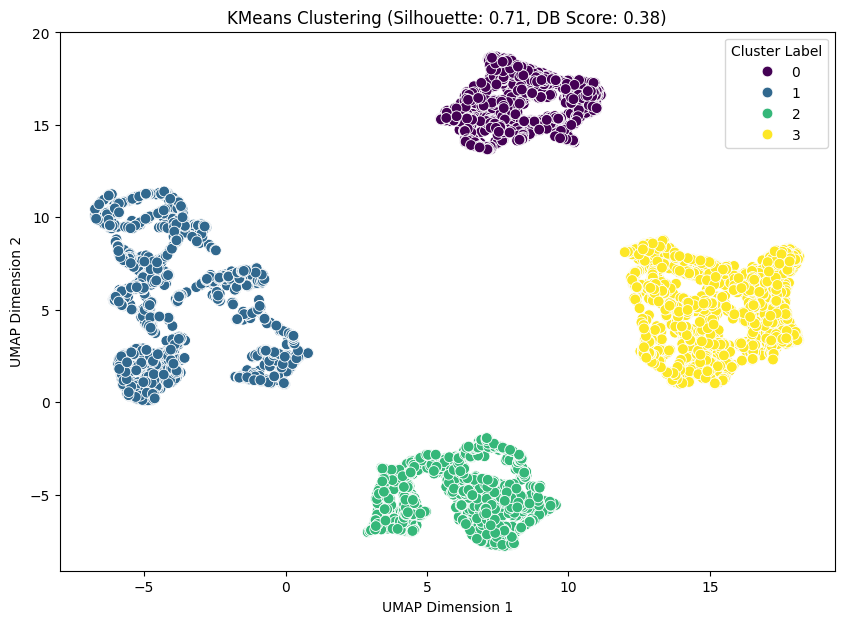

In [164]:
# Step 1: Create a DataFrame from the UMAP results and KMeans labels
umap_df = pd.DataFrame(X_umap, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])
umap_df['Cluster'] = k_labels

# Step 2: Plot the clusters
sns.set_palette('coolwarm')
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_df['UMAP Dimension 1'], y=umap_df['UMAP Dimension 2'], hue=umap_df['Cluster'], palette="viridis", s=60)
plt.title(f'KMeans Clustering (Silhouette: {silhouette:.2f}, DB Score: {davies:.2f})')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster Label")
plt.show()

## 7.2 Agglomerative Clustering

## Hyperparameter Tunning for Agglomerative Clustering model

In [162]:
# Define a parameter grid
param_grid = {
    "distance_thresholds": [5, 10, 15, 20, 25, 30, 35, 40, 50],
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = {}

# Loop through the parameter grid
for threshold in param_grid['distance_thresholds']:
    for linkage in param_grid['linkage']:
        for metric in param_grid['metric']:
            # Ward linkage requires Euclidean distance
            if linkage == 'ward' and metric != 'euclidean':
                continue

            model = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold, linkage=linkage, metric=metric)
            labels = model.fit_predict(X_umap)

            # Evaluate using Silhouette Score
            if len(set(labels)) > 1:  # Skip single cluster scenarios
                score = silhouette_score(X_umap, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'distance_threshold': threshold, 'linkage': linkage, 'metric': metric}

print(f"Best Score: {best_score}")
print("Best Params:", best_params)


Best Score: 0.71117103099823
Best Params: {'distance_threshold': 5, 'linkage': 'single', 'metric': 'euclidean'}


## Building and evaluating Agglomerative model with best params

In [163]:
agglo_model = AgglomerativeClustering(n_clusters=None, distance_threshold = 5 , linkage="single", metric="euclidean").fit(X_umap)
agglo_labels = agglo_model.labels_

silhouette_agglo = silhouette_score(X_umap, agglo_model.labels_)
print(f'Silhouette Score: {silhouette_agglo}')

devies_agglo = davies_bouldin_score(X_umap, agglo_model.labels_)
print(f'Davies-Bouldin Index: {devies_agglo}')

Silhouette Score: 0.71117103099823
Davies-Bouldin Index: 0.38310316368325903


## Plotting Agglomerative predicted clusters

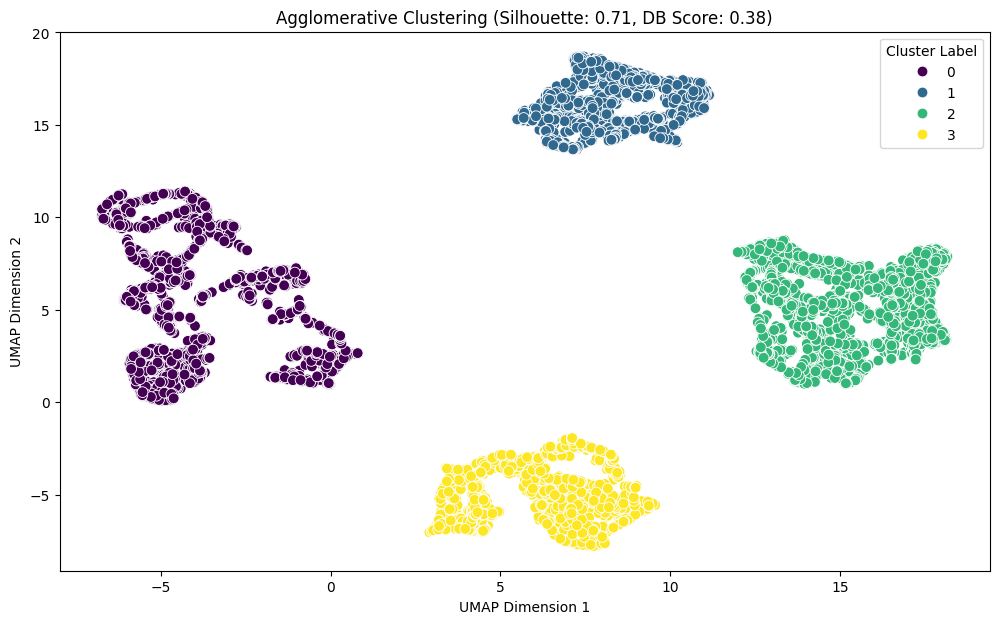

In [56]:
# Step 1: Create a DataFrame from the UMAP results and KMeans labels
umap_df = pd.DataFrame(X_umap, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])
umap_df['Cluster'] = agglo_labels

# Step 2: Plot the clusters
sns.set_palette('coolwarm')
plt.figure(figsize=(12, 7))
sns.scatterplot(x=umap_df['UMAP Dimension 1'], y=umap_df['UMAP Dimension 2'], hue=umap_df['Cluster'], palette="viridis", s=60)
plt.title(f'Agglomerative Clustering (Silhouette: {silhouette_agglo:.2f}, DB Score: {devies_agglo:.2f})')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster Label")
plt.show()

## 7.3 Gaussian Mixture Model (GMM)

## Hyperparameter tunning for GMM

In [60]:
# Define a range of hyperparameters
n_components_range = range(2, 11)
covariance_types = ['full', 'tied', 'diag', 'spherical']

best_silhouette = -1  # Initialize the best silhouette score to a low value
best_params = {}  # Dictionary to store the best parameters

for n_components in n_components_range:
    for cov_type in covariance_types:
        # Fit the GaussianMixture model with the current set of parameters
        model = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=0)
        gm_labels = model.fit_predict(X_umap)

        # Calculate silhouette score
        silhouette = silhouette_score(X_umap, gm_labels)

        # Track the best silhouette score and parameters
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_params = {'n_components': n_components, 'covariance_type': cov_type}

# Print the best parameters and corresponding silhouette score
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Parameters: {best_params}")

Best Silhouette Score: 0.71117103099823
Best Parameters: {'n_components': 4, 'covariance_type': 'full'}


## Building and evaluating model with best params

In [72]:
model = GaussianMixture(n_components=4 , covariance_type='full')
gm_labels = model.fit_predict(X_umap)



print(np.unique(gm_labels))
silhouette_gm = silhouette_score(X_umap, gm_labels)
print(f'Silhouette Score: {silhouette_gm}')

devies_gm = davies_bouldin_score(X_umap, gm_labels)
print(f'Davies-Bouldin Index: {devies_gm}')


[0 1 2 3]
Silhouette Score: 0.71117103099823
Davies-Bouldin Index: 0.38310316368325903


## Plotting scatterplot to show clusters predicted by GMM

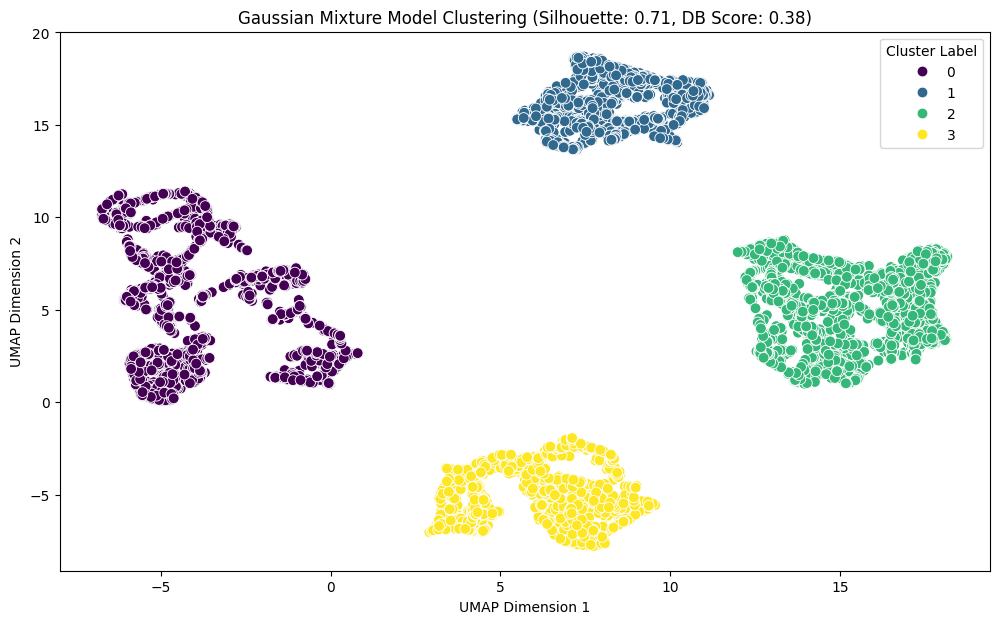

In [165]:
# Step 1: Create a DataFrame from the UMAP results and KMeans labels
umap_df = pd.DataFrame(X_umap, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])
umap_df['Cluster'] = gm_labels

# Step 2: Plot the clusters
sns.set_palette('coolwarm')
plt.figure(figsize=(12, 7))
sns.scatterplot(x=umap_df['UMAP Dimension 1'], y=umap_df['UMAP Dimension 2'], hue=umap_df['Cluster'], palette="viridis", s=60)
plt.title(f'Gaussian Mixture Model Clustering (Silhouette: {silhouette_gm:.2f}, DB Score: {devies_gm:.2f})')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster Label")
plt.show()

# 8. Cluster Interpretation and Visualization

## Making cluster dataframe

In [80]:
df_cluster = df_scaled.copy()
df_cluster["cluster"] = k_labels
df_cluster["cluster"].head()

0    2
1    1
2    3
3    0
4    3
Name: cluster, dtype: int32

## Plotting side by side bar chart with tenure on 2nd axis

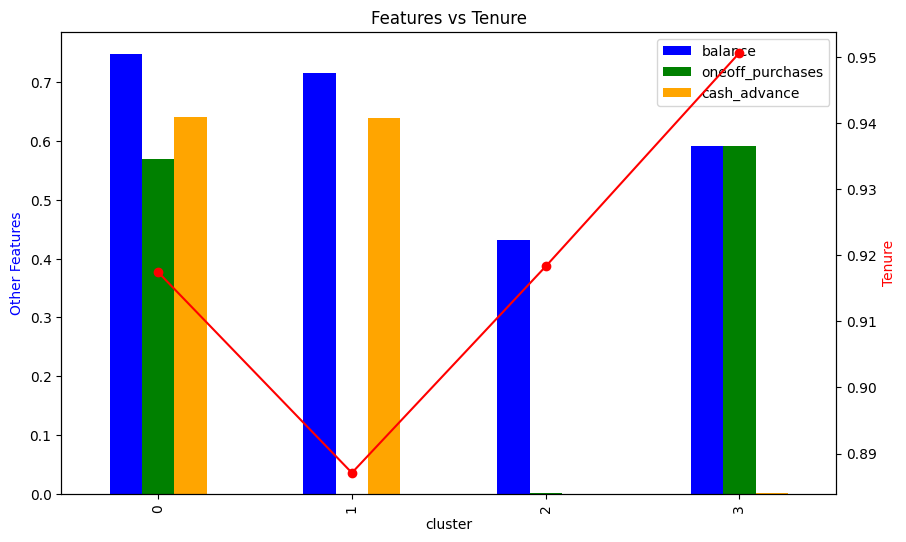

In [166]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the features excluding tenure with custom colors
df_cluster.groupby('cluster')[['balance', 'oneoff_purchases', 'cash_advance']].mean().plot(kind='bar', ax=ax1, color=['blue', 'green', 'orange'])

# Set the y-axis label for scaled values
ax1.set_ylabel('Other Features', color='b')

# Creating another axis for tenure
ax2 = ax1.twinx()
df_cluster.groupby('cluster')['tenure'].mean().plot(kind='line', ax=ax2, color='r', marker='o')

# Set the y-axis label for tenure
ax2.set_ylabel('Tenure', color='r')

# Set the title
plt.title("Features vs Tenure")

# Show the plot
plt.show()


### Customer Segmentation Insights:
- **Cluster 0: Selective Spenders**: These customers have high balances and prefer occasional large purchases with moderate cash advance usage, indicating selective spending habits.
- **Cluster 1: Credit-Dependent Users**: Frequent reliance on cash advances and lower purchase activity suggests these customers are dependent on credit for short-term financial needs.
- **Cluster 2: Low-Engagement Savers**: Minimal activity across features shows these customers are financially conservative or inactive, using their accounts infrequently.
- **Cluster 3: High-Value Loyalists**: High balance and purchase activity with low cash advance usage indicates these customers are financially stable and highly valuable, showing consistent credit usage.


## Plotting Boxplot to analyse payment patterns across various clusters

<ipython-input-167-30dbd9a3a0dc>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




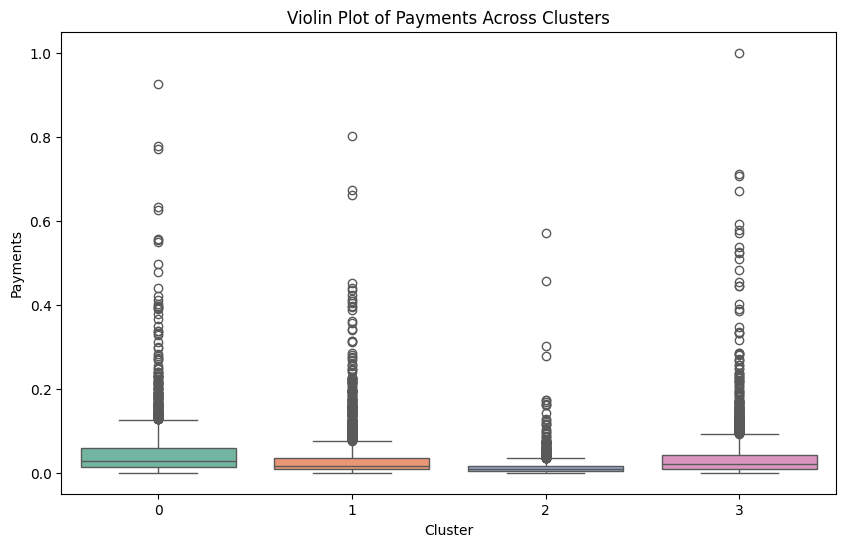

In [167]:
# Box plot to visualize distribution of payments across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='payments', data=df_cluster, palette='Set2')

# Set the title and labels
plt.title("Violin Plot of Payments Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Payments")

# Show the plot
plt.show()


### Payments Behavior by Customer Segments:
- **Cluster 0: Selective Spenders**: Likely to make occasional, larger payments corresponding to infrequent, high-value purchases.
- **Cluster 1: Credit-Dependent Users**: Smaller, frequent payments focused on managing cash advances and credit balances.
- **Cluster 2: Low-Engagement Savers**: Minimal and infrequent payments, reflecting low account engagement and conservative financial behavior.
- **Cluster 3: High-Value Loyalists**: Regular and substantial payments, reflecting financial stability and responsible credit usage.



# Saving Kmeans Model to pickle file

In [168]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(k_model, file)
